In [ ]:
!pip install textblob nrclex wordcloud matplotlib seaborn pandas

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=188c1bcc941e63d08c19aac1aed9d6695eccfeb049be8cd0aa7eb62f9c8be2f6
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built nrclex


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nrclex import NRCLex
from wordcloud import WordCloud
import re

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload sample_tweets.csv

df = pd.read_csv("sample_tweets.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

Saving sample_tweets.csv to sample_tweets.csv


,Timestamp,Tweet
0,2025-05-14 12:01:00,"AI will revolutionize everything, it's so exci..."
1,2025-05-14 12:03:00,"Climate change is scary, we must act now!"
2,2025-05-14 12:05:00,Feeling hopeful about future technologies.
3,2025-05-14 12:08:00,"Pollution is making life difficult, very depre..."
4,2025-05-14 12:10:00,AI and automation might replace human jobs soon.


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Tweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Timestamp'}, axis=1)
              .sort_values('Timestamp', ascending=True))
  xs = counted['Timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Timestamp'}, axis=1)
              .sort_values('Timestamp', ascending=True))
  xs = counted['Timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('count()')

In [ ]:
def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    return text.lower().strip()

df['Cleaned_Tweet'] = df['Tweet'].apply(clean_tweet)

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Cleaned_Tweet'].apply(get_sentiment)

<ipython-input-10-f74e6d015968>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


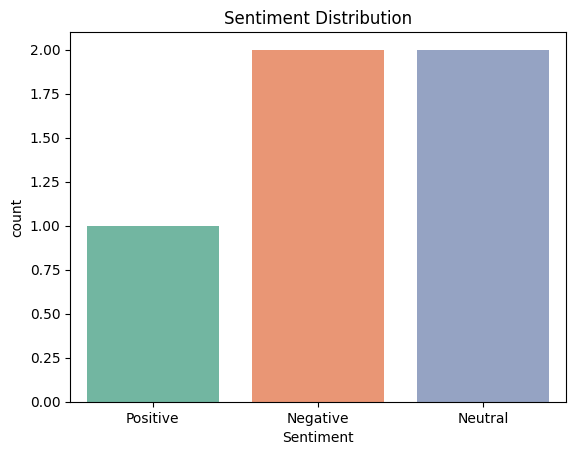

<ipython-input-10-f74e6d015968>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Emotion', palette='muted')


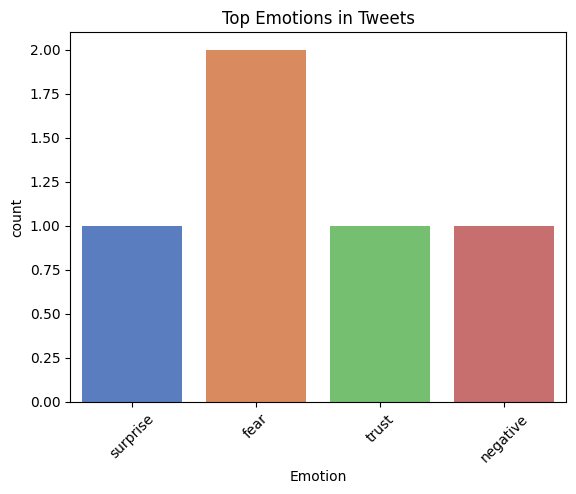

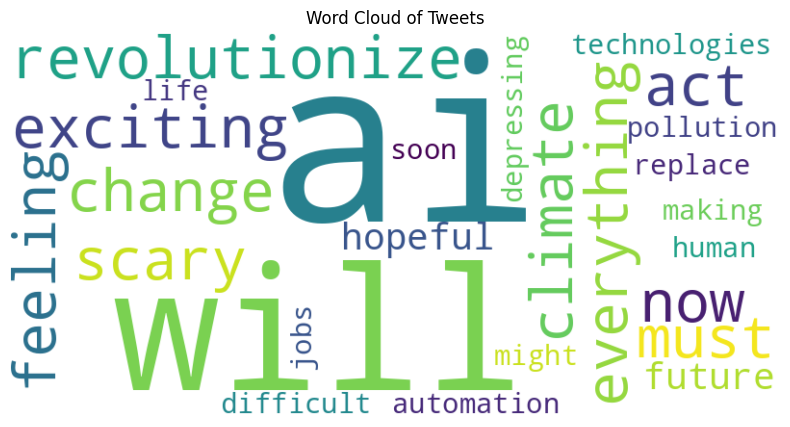

In [ ]:
def detect_emotion(text):
    emotion = NRCLex(text)
    if emotion.top_emotions:
        return emotion.top_emotions[0][0]  # top emotion
    return "unknown"

df['Emotion'] = df['Cleaned_Tweet'].apply(detect_emotion)
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.show()
sns.countplot(data=df, x='Emotion', palette='muted')
plt.title("Top Emotions in Tweets")
plt.xticks(rotation=45)
plt.show()
all_words = " ".join(df['Cleaned_Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets")
plt.show()

<ipython-input-11-67a642ac1b30>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  sentiment_trend = df.resample('T')['Sentiment'].value_counts().unstack().fillna(0)


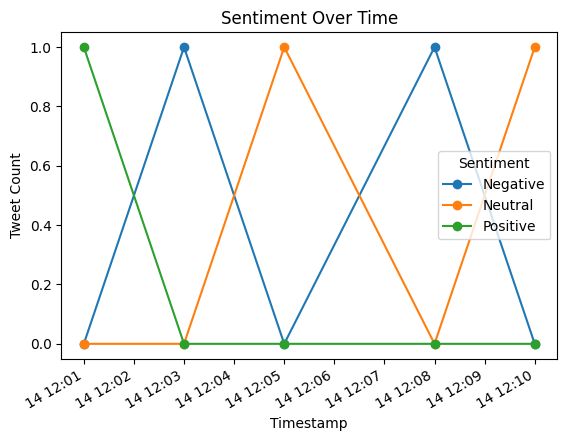

In [ ]:
df.set_index('Timestamp', inplace=True)
sentiment_trend = df.resample('T')['Sentiment'].value_counts().unstack().fillna(0)

sentiment_trend.plot(marker='o')
plt.title("Sentiment Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.show()

In [ ]:

!python -m textblob.download_corpora
!python -m nltk.downloader punkt_tab

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date